**Business Understanding**

Project Domain

Domain: Kecerdasan Buatan (AI) & Pemrosesan Bahasa Alami (NLP)

Sub-Domain: Analisis Sentimen pada Ulasan Film dengan Machine Learning

Proyek ini berfokus pada penerapan kecerdasan buatan (AI) dalam bidang pemrosesan bahasa alami (NLP), dengan tujuan untuk melakukan analisis sentimen terhadap ulasan film. Model yang dibangun bertujuan untuk mengklasifikasikan ulasan film sebagai positif atau negatif dengan menggunakan teknik-teknik machine learning.

Pemrosesan Bahasa Alami (NLP) adalah cabang dari AI yang bertujuan untuk memungkinkan sistem komputer memahami, menganalisis, dan menghasilkan teks yang berarti. Dalam hal ini, tantangan utama adalah memahami sentimen atau perasaan dalam teks, yang sering kali tersembunyi dalam kata-kata dan memerlukan pemahaman konteks serta struktur bahasa.

Analisis sentimen adalah sub-domaine dalam NLP yang berfokus pada menentukan apakah teks mengandung sentimen positif, negatif, atau netral. Dalam konteks ini, proyek ini berupaya mengklasifikasikan apakah sebuah ulasan film lebih bersifat positif atau negatif berdasarkan model machine learning yang dilatih menggunakan dataset IMDB.

**Problem Statements**

Deteksi sentimen dalam teks dapat menjadi tugas yang sulit karena kata-kata yang digunakan tidak selalu eksplisit dalam menunjukkan perasaan positif atau negatif. Beberapa masalah yang dihadapi dalam proyek ini antara lain:

- Bagaimana model dapat mendeteksi sentimen dalam teks yang tidak menggunakan kata-kata eksplisit untuk menunjukkan perasaan positif atau negatif?

- Bagaimana cara membangun model yang dapat mengklasifikasikan ulasan film sebagai positif atau negatif hanya dengan menganalisis pola-pola dalam teks?

**Goals**

Tujuan dari proyek ini adalah:

- Membangun model machine learning yang dapat mengklasifikasikan ulasan film sebagai positif atau negatif berdasarkan analisis sentimen.

- Menggunakan dataset IMDB yang mengandung ulasan film yang telah dilabeli untuk melatih model.

- Menerapkan teknik-teknik pemrosesan teks seperti tokenisasi, embedding, dan LSTM untuk memperoleh representasi yang lebih baik dari kata-kata dalam ulasan.

- Meningkatkan akurasi model dalam mengklasifikasikan sentimen pada ulasan film dalam bahasa Inggris.

**Solution Statements**

Solusi yang diusulkan dalam proyek ini adalah:

- Penggunaan LSTM untuk Deep Learning: Model LSTM (Long Short-Term Memory) digunakan untuk memproses urutan kata dalam ulasan film, yang memungkinkan model untuk menangkap hubungan antara kata-kata dalam kalimat dan memahami sentimen yang terkandung di dalamnya.

- Dataset IMDB: Dataset IMDB, yang berisi ulasan film yang sudah dilabeli sebagai positif atau negatif, digunakan untuk melatih model. Dataset ini memberikan data yang cukup untuk membangun model yang dapat mengidentifikasi sentimen dalam teks ulasan film.

- Preprocessing Teks: Teks diolah melalui beberapa langkah pemrosesan, termasuk tokenisasi untuk memecah kalimat menjadi kata-kata, diikuti dengan embedding untuk mengubah kata-kata menjadi representasi numerik. Teknik padding juga diterapkan untuk memastikan panjang urutan kata konsisten sehingga model dapat memprosesnya dengan baik.

- Pengembangan Aplikasi Web: Dengan menggunakan Streamlit, aplikasi ini memungkinkan pengguna untuk memasukkan ulasan film dan mendapatkan prediksi apakah ulasan tersebut mengandung sentimen positif atau negatif.

- Model Deep Learning: Model yang digunakan adalah LSTM, yang telah dilatih menggunakan dataset IMDB untuk memprediksi apakah ulasan film tersebut bersifat positif atau negatif.

In [ ]:
!pip install pandas

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

from wordcloud import WordCloud
from collections import Counter
import re
from bs4 import BeautifulSoup
import contractions
from collections import Counter
import pickle
import json

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [ ]:
nltk.download('punkt', download_dir='/content/nltk_data/')
nltk.download('stopwords', download_dir='/content/nltk_data/')
nltk.download('punkt_tab', download_dir='/content/nltk_data/')


[nltk_data] Downloading package punkt to /content/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data/...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /content/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.data.path.append('/content/nltk_data/')

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')

# Data Understanding

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


# Exploratory Data Analysis

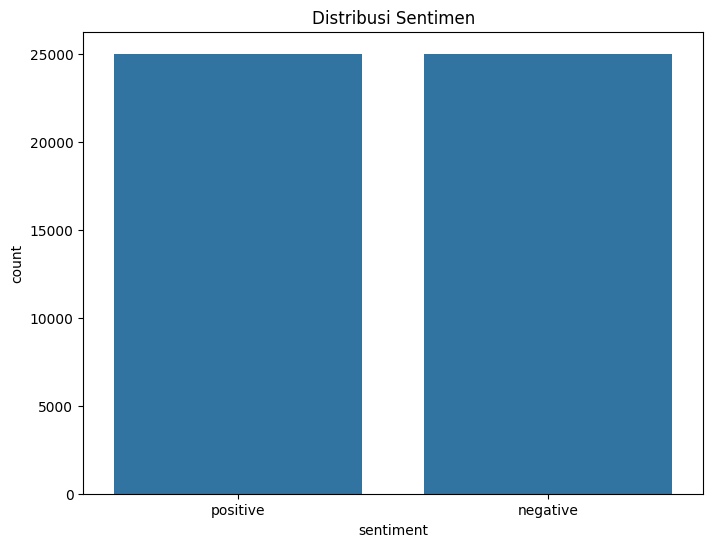

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribusi Sentimen')
plt.show()


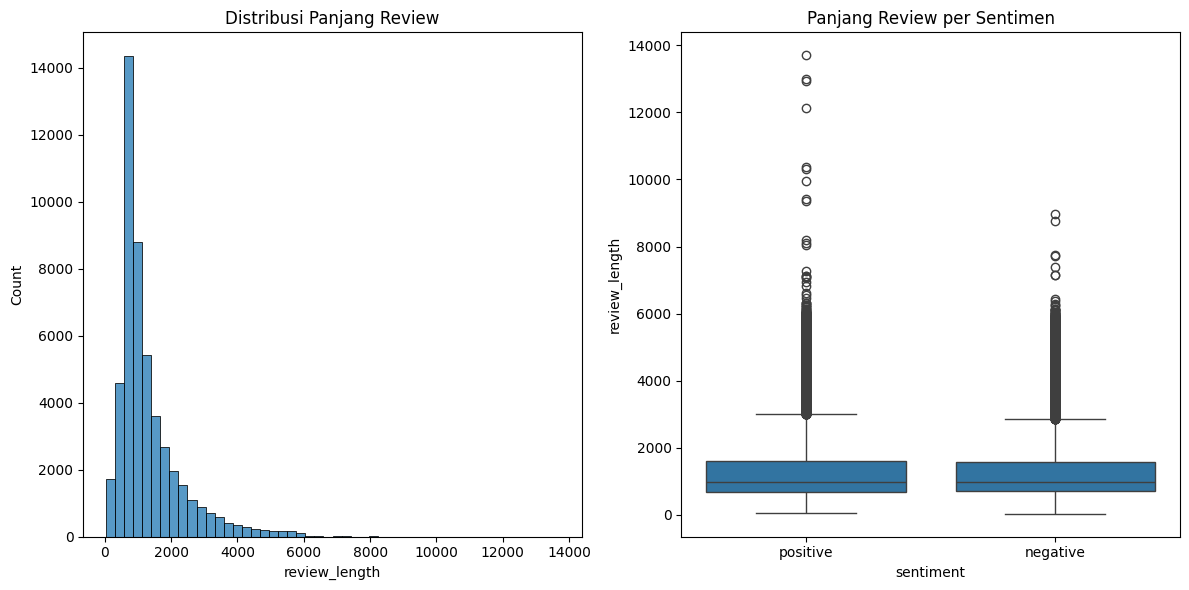

In [ ]:
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['review_length'], bins=50)
plt.title('Distribusi Panjang Review')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title('Panjang Review per Sentimen')
plt.tight_layout()
plt.show()

In [ ]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
df['review_length'].describe()

,review_length
count,50000.000000
mean,231.156940
std,171.343997
min,4.000000
25%,126.000000
50%,173.000000
75%,280.000000
max,2470.000000


In [ ]:
def clean_text(text):
    # Hapus tag HTML menggunakan BeautifulSoup
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Hapus angka dan karakter khusus
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', ' ', text)  # Hapus semua karakter non-word dan non-space

    # Hapus tanda baca spesifik dan konversi ke lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenisasi
    tokens = word_tokenize(text)

    # Hapus stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Hapus token dengan panjang < 2 (karakter tunggal)
    tokens = [word for word in tokens if len(word) > 1]

    return tokens


In [ ]:
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

In [ ]:
def get_common_words(reviews, n=20):
    all_words = []
    for review in reviews:
        words = clean_text(review)
        all_words.extend(words)
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

In [ ]:
common_positive = get_common_words(positive_reviews)
common_negative = get_common_words(negative_reviews)

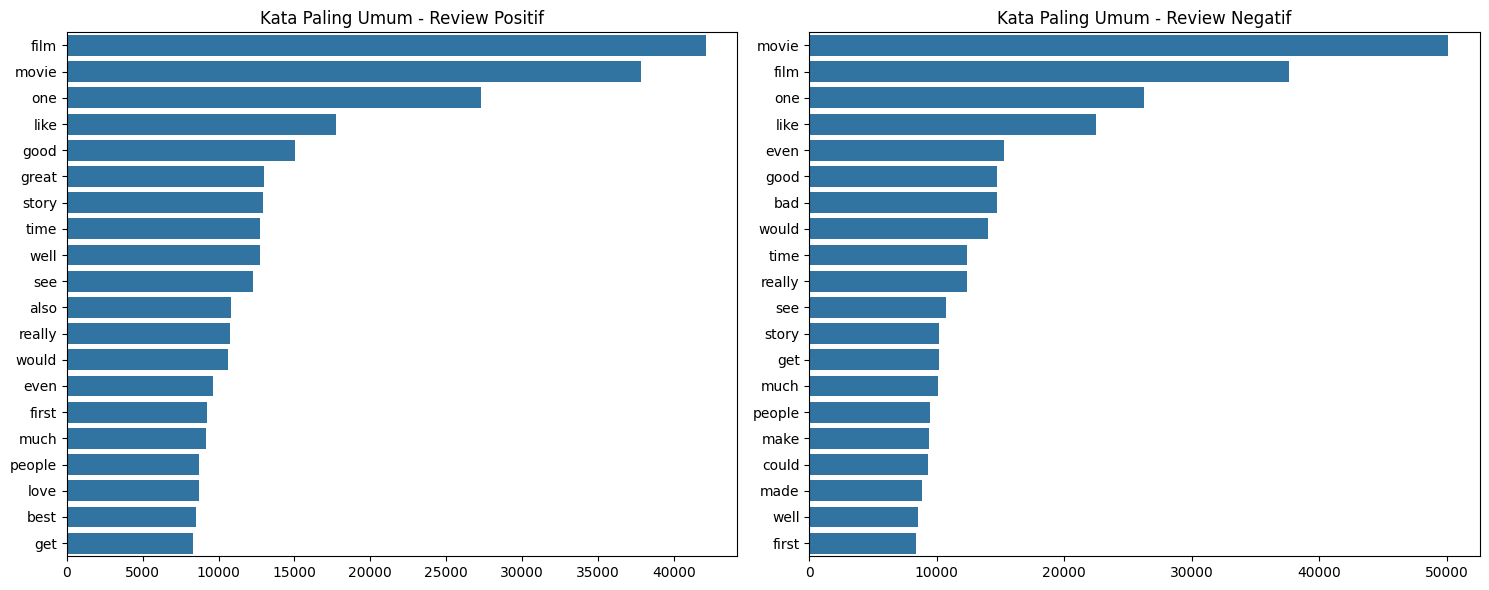

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
positive_words, positive_counts = zip(*common_positive)
sns.barplot(x=list(positive_counts), y=list(positive_words))
plt.title('Kata Paling Umum - Review Positif')

plt.subplot(1, 2, 2)
negative_words, negative_counts = zip(*common_negative)
sns.barplot(x=list(negative_counts), y=list(negative_words))
plt.title('Kata Paling Umum - Review Negatif')
plt.tight_layout()
plt.show()

In [ ]:
def plot_wordcloud(tokens, title):
    text = ' '.join(tokens)
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
positive_tokens = []
for review in positive_reviews:
    positive_tokens.extend(clean_text(review))

In [ ]:
negative_tokens = []
for review in negative_reviews:
    negative_tokens.extend(clean_text(review))

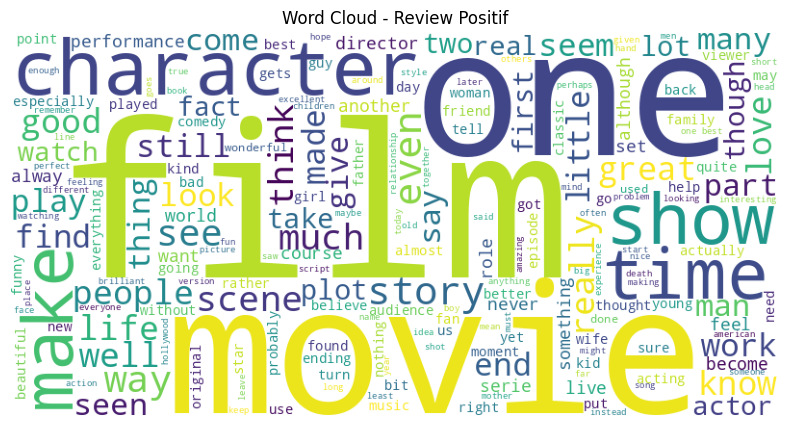

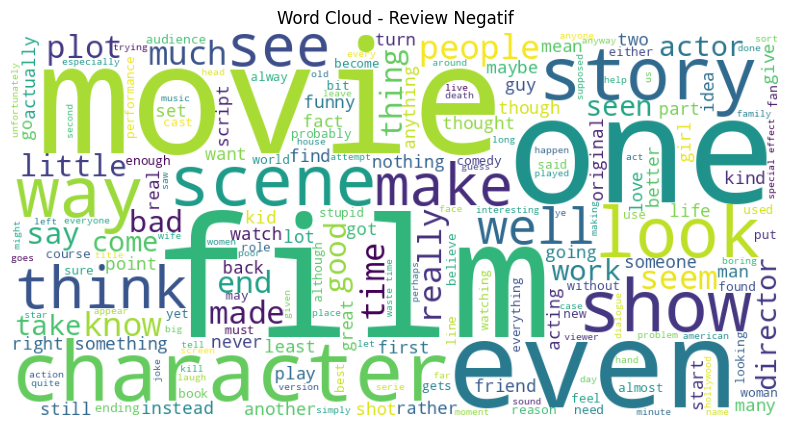

In [ ]:
plot_wordcloud(positive_tokens, 'Word Cloud - Review Positif')
plot_wordcloud(negative_tokens, 'Word Cloud - Review Negatif')

In [ ]:
def get_common_bigrams(reviews, n=10):
    all_bigrams = []
    for review in reviews:
        words = clean_text(review)
        bigrams = list(nltk.bigrams(words))
        all_bigrams.extend(bigrams)
    bigram_counts = Counter(all_bigrams)
    return bigram_counts.most_common(n)

In [ ]:
common_positive_bigrams = get_common_bigrams(positive_reviews)
common_negative_bigrams = get_common_bigrams(negative_reviews)

In [ ]:
print(common_positive_bigrams)

[(('one', 'best'), 1679), (('even', 'though'), 1099), (('ever', 'seen'), 977), (('first', 'time'), 960), (('new', 'york'), 854), (('special', 'effects'), 806), (('must', 'see'), 777), (('see', 'movie'), 769), (('real', 'life'), 760), (('years', 'ago'), 741)]


In [ ]:
print(common_negative_bigrams)

[(('ever', 'seen'), 1730), (('special', 'effects'), 1443), (('waste', 'time'), 1434), (('looks', 'like'), 1235), (('low', 'budget'), 1228), (('much', 'better'), 1008), (('one', 'worst'), 961), (('look', 'like'), 943), (('year', 'old'), 915), (('bad', 'movie'), 903)]


In [ ]:
df.groupby('sentiment')['review_length'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,25000.0,229.46456,164.947795,4.0,128.0,174.0,278.0,1522.0
positive,25000.0,232.84932,177.497046,10.0,125.0,172.0,284.0,2470.0


# Data Preparation

In [ ]:
clean_df = df.copy()

In [ ]:
clean_df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [ ]:
def preprocessing(review):
    review = BeautifulSoup(review, 'html.parser').get_text()

    review = contractions.fix(review)

    review = re.sub(r"[^a-zA-Z\s]", '', review)

    review = review.lower()

    review = ' '.join(review.split())

    return review

In [ ]:
clean_df['reviews_cleaned'] = clean_df['review'].apply(preprocessing)

In [ ]:
clean_df.head()

,review,sentiment,review_length,reviews_cleaned
0,One of the other reviewers has mentioned that ...,positive,307,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,166,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love in the time of money is a ...


In [ ]:
def get_vocab_size(texts):
    all_words = []
    for text in texts.dropna():
        if isinstance(text, list):
            all_words.extend(text)
        else:
            all_words.extend(text.split())
    word_counts = Counter(all_words)
    return len(word_counts)

In [ ]:
vocab_size = get_vocab_size(clean_df['reviews_cleaned'])
print(f"Total unique words: {vocab_size}")

Total unique words: 213260


In [ ]:
def determine_num_words(texts, min_freq=2):
    all_words = []
    for text in texts.dropna():
        if isinstance(text, list):
            all_words.extend(text)
        else:
            all_words.extend(text.split())
    word_counts = Counter(all_words)
    frequent_words = [word for word, count in word_counts.items() if count >= min_freq]
    return len(frequent_words)


In [ ]:
num_words = determine_num_words(clean_df['reviews_cleaned'], min_freq=2)
print(f"Recommended num_words (min freq 2): {num_words}")

Recommended num_words (min freq 2): 81610


In [ ]:
# Membagi data menjadi train (80%), val (10%), dan test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(
    clean_df['review'],
    clean_df['sentiment'],
    test_size=0.2,
    random_state=42,
    stratify=clean_df['sentiment']  # Stratify untuk memastikan distribusi label tetap seimbang
)

# Membagi X_temp menjadi val (50% dari 20%) dan test (50% dari 20%) - masing-masing 10%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp  # Stratify untuk memastikan distribusi label tetap seimbang
)

In [ ]:
print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 40000, Validation: 5000, Test: 5000


In [ ]:
X_train_clean = X_train.apply(preprocessing)
X_val_clean = X_val.apply(preprocessing)
X_test_clean = X_test.apply(preprocessing)

In [ ]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_clean)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train_clean)
val_sequences = tokenizer.texts_to_sequences(X_val_clean)
test_sequences = tokenizer.texts_to_sequences(X_test_clean)

In [ ]:
max_len = 256  # Panjang maksimal sequence
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_padded, y_train_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices((val_padded, y_val_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((test_padded, y_test_encoded))


In [ ]:
batch_size = 64
train_dataset = train_dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)

# Modeling

In [ ]:
model = Sequential([
    Embedding(input_dim=50000,
              output_dim=200,
              input_length=max_len),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 200)       │    10,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       336,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,060,229 (118.49 MB)

 Trainable params: 10,353,409 (39.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,706,820 (78.99 MB)

In [ ]:
history = model.fit(
    train_dataset,  # Dari tf.data.Dataset (sudah dipadded)
    validation_data=val_dataset,
    epochs=10,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 962s 2s/step - accuracy: 0.8376 - loss: 0.3995 - val_accuracy: 0.8492 - val_loss: 0.3617
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 969s 2s/step - accuracy: 0.8596 - loss: 0.3512 - val_accuracy: 0.8112 - val_loss: 0.5432
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 946s 2s/step - accuracy: 0.9015 - loss: 0.2615 - val_accuracy: 0.8568 - val_loss: 0.3638
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 980s 2s/step - accuracy: 0.9460 - loss: 0.1545 - val_accuracy: 0.8670 - val_loss: 0.4255
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 946s 2s/step - accuracy: 0.9631 - loss: 0.1130 - val_accuracy: 0.8500 - val_loss: 0.5082
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 976s 2s/step - accuracy: 0.9741 - loss: 0.0777 - val_accuracy: 0.8592 - val_loss: 0.5422
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 934s 1s/step - accuracy: 0.9840 - loss: 0.0506 - val_accuracy: 0.8554 - val_loss: 0.6460
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 936s 1s/step - accuracy: 0.9901 - loss: 0.0332 - val_accu

# Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nTest Accuracy: {test_acc:.2%}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.8607 - loss: 0.7642

Test Accuracy: 85.72%


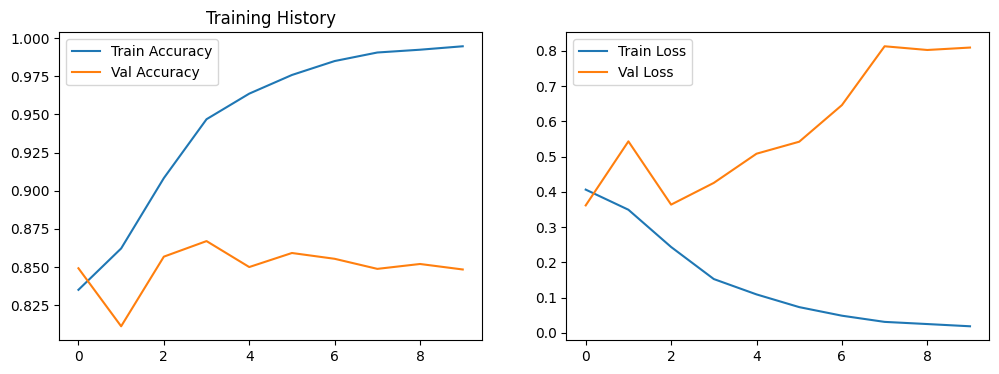

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training History')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_probs = model.predict(test_dataset)
y_pred = (y_pred_probs > 0.5).astype(int)


79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 279ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred,
                          target_names=['negative', 'positive']))


Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      2500
    positive       0.87      0.84      0.85      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



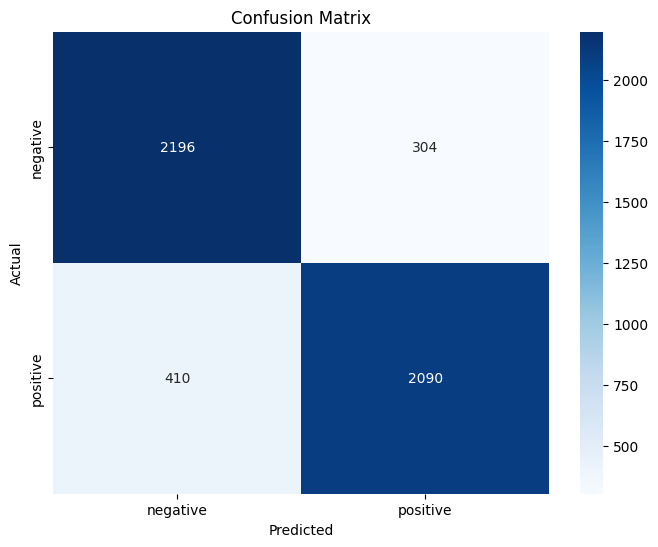

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('imdb_sentiment_model.h5')

with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Simpan metadata
metadata = {
    'max_len': max_len,
    'embedding_dim': 128,
    'vocab_size': vocab_size
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f)

print("Model dan komponen pendukung berhasil disimpan!")

Model dan komponen pendukung berhasil disimpan!


# Deployment

In [ ]:
# Load komponen
model = load_model('imdb_sentiment_model.h5')

with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

with open('model_metadata.json', 'r') as f:
    metadata = json.load(f)

In [ ]:
# Fungsi prediksi siap pakai
def predict_sentiment(text):
    # Clean text
    text = preprocessing(text)

    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=metadata['max_len'])

    # Predict
    prob = model.predict(padded)[0][0]
    sentiment = 'positive' if prob > 0.5 else 'negative'
    confidence = prob if sentiment == 'positive' else 1 - prob

    return {
        'text': text[:200] + ('...' if len(text) > 200 else ''),
        'sentiment': sentiment,
        'confidence': float(confidence),
        'probability': float(prob)
    }

In [ ]:
sample_review = "Absolute Cinema"
result = predict_sentiment(sample_review)
print("\nPrediction Result:")
for k, v in result.items():
    print(f"{k:>12}: {v}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step

Prediction Result:
        text: absolute cinema
   sentiment: positive
  confidence: 0.945889949798584
 probability: 0.945889949798584
